# lec07_[실습]이미지분류(CATS AND DOGS)
* ref : https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,f1_score

from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling2D
from keras import layers
import tensorflow as tf
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal,HeNormal,   RandomNormal, Zeros, Identity , Orthogonal , Constant , VarianceScaling


In [3]:
tf.random.set_seed(1)
np.random.seed(1)

# Data Load

## PIL
* img = image.open("경로")
* plt.image.show()

In [4]:
import os
base_path = "./datasets/catsanddogs/train/cat"
img_path_list = os.listdir(base_path)[:5]
print(img_path_list)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']


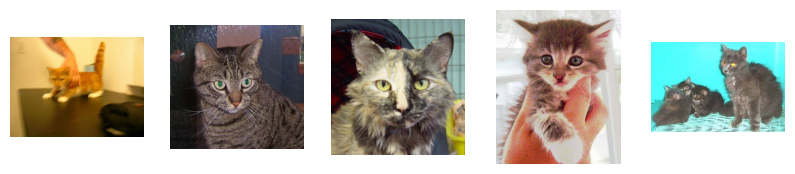

In [5]:
import matplotlib.image as pltimg
plt.figure(figsize=(10,2))

for i, fname in enumerate(img_path_list):
    plt.subplot(1, len(img_path_list), i+1)
    img = pltimg.imread(os.path.join(base_path, fname)) # matplotlib.image.imread("경로") >> 이미지 보여주기
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')

## opencv

In [6]:
# ! pip install opencv-python

## keras

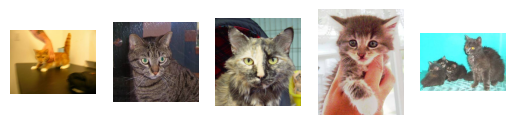

In [15]:
from keras.utils import load_img
img = load_img("./datasets/catsanddogs/train/cat/cat.0.jpg")
for i, fname in enumerate(img_path_list):
    plt.subplot(1, len(img_path_list), i+1)
    img = pltimg.imread(os.path.join(base_path, fname)) # matplotlib.image.imread("경로") >> 이미지 보여주기
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')

<pre>
* root_dir
    - train
        - cat(label)
            -.... .png
        - dog(label)
             -.... .png
    - test
    

In [17]:
print(f"train cat : {len(os.listdir('./datasets/catsanddogs/train/cat'))}")
print(f"train dog : {len(os.listdir('./datasets/catsanddogs/train/dog'))}")
print(f"test      : {len(os.listdir('./datasets/catsanddogs/test/test'))}")

train cat : 301
train dog : 301
test      : 64


# 전처리 & 가공

## 스케일링
* X_train/255.0

## 리사이징
X_train.resize(w,h)

## 증강

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
MY_WIDTH__       = 150
MY_HEIGHT__      = 150
MY_EPOCH__       = 10
MY_BATCH_SIZE__  = 64
MY_SEED__        =0

# __(언더바 *2) : 맹글링 변수, 수정하지 말아라
# +)  파이썬에서 맹글링은 크게 3가지 상황에서 사용할 수 있음.

# 1. 클래스의 속성값을 외부에서 접근하기 힘들게 할 때 (private화)

# 2. 하위 클래스가 상위 클래스의 속성을 오버라이딩 하는 것을 막을때

# 3. 이름 충돌 문제 

In [23]:
generator = ImageDataGenerator(  rotation_range=20
                                ,rescale = 1./255.
                                
                                ,zoom_range = 0.1
                                ,horizontal_flip =True
                                ,vertical_flip = False
                                ,validation_split=0.2)

test_generator = ImageDataGenerator(rescale = 1./255.)

train_iter = generator.flow_from_directory(directory = "./datasets/catsanddogs/train"
                                 , target_size=(MY_WIDTH__, MY_HEIGHT__)
                                 , class_mode='binary'
                                 , batch_size=MY_BATCH_SIZE__
                                 , shuffle=True
                                 , seed=MY_SEED__
                                 , subset="training" )  # "training", "validation"


val_iter = generator.flow_from_directory(directory = "./datasets/catsanddogs/train"
                                 , target_size=(MY_WIDTH__, MY_HEIGHT__)
                                 , class_mode='binary'
                                 , batch_size=MY_BATCH_SIZE__
                                 , shuffle=True
                                 , seed=MY_SEED__
                                 , subset="validation" )  # "training", "validation"

# test_iter = test_generator.flow_from_directory(directory = "./datasets/catsanddogs/train"
#                                  # , target_size=(MY_WIDTH__, MY_HEIGHT__)                          
#                                  # , batch_size=MY_BATCH_SIZE__                    
#                                  # , seed=MY_SEED__
#                                  # )  # "training", "validation"


# train_iter = generator.flow_from_directory()
# val_iter   = generator.flow_from_directory()
# test_iter  = generator_test.flow_from_directory()



Found 482 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# 모델

In [24]:
model = Sequential()


#-----------------CNN


model.add(Conv2D(filters=16, input_shape=(MY_WIDTH__,MY_HEIGHT__,3), kernel_size=(5,5), strides=(1, 1),padding='valid',activation="relu",kernel_initializer='glorot_uniform'))
# 내보내는 필터갯수가 16 
model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None))
# 필터 갯수 지정 안 한다, 사이즈 조정만 하는 거니까
model.add(Conv2D(filters=16, kernel_size=(5,5),activation="relu"))
# 내보내는 필터갯수가 16 
model.add(MaxPool2D(pool_size=(2, 2)))


#-----------------Fully Connected

model.add(Flatten())
model.add(Dense(units=50,  activation='relu'))    
model.add(Dense(units=1,  activation='sigmoid'))     # 출력층
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18496)             0         
                                                                 
 dense (Dense)               (None, 50)                9

In [27]:
model.fit(train_iter
          ,epochs=MY_EPOCH__
          ,steps_per_epoch=train_iter.samples/MY_BATCH_SIZE__  #482/64
          ,validation_data=val_iter
          ,validation_steps=val_iter.samples/MY_BATCH_SIZE__    #120/64
         )
# print(model.evaluate(X_test_scaler, y_test))

Epoch 1/10
7/7 [==============================] - 10s 880ms/step - loss: 0.9517 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 6s 775ms/step - loss: 0.6927 - accuracy: 0.4979 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 6s 823ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 6s 802ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.5333
Epoch 5/10
7/7 [==============================] - 6s 801ms/step - loss: 0.6886 - accuracy: 0.5187 - val_loss: 0.6904 - val_accuracy: 0.4833
Epoch 6/10
7/7 [==============================] - 6s 903ms/step - loss: 0.6827 - accuracy: 0.5539 - val_loss: 0.6924 - val_accuracy: 0.5333
Epoch 7/10
7/7 [==============================] - 6s 805ms/step - loss: 0.6810 - accuracy: 0.5809 - val_loss: 0.6838 - val_accuracy: 0.5917
Epoch 8/10
7/7 [===

* steps_per_epoch : 에포당 증강단위, sample/batch_size가 최대, 줄일 수 있지만 줄이진 않는다
* 데이터 100건, batch_size 20, epoch 2
    - 100/20 = 5 , steps_per_epoch 최대값>> 5
    - 5 * 2(epoch) =10 # 총 10번 증간한다

# 전이학습
* ref : https://keras.io/api/applications/
* flatten 하면 기울기 소실 발생 >> 대신에 pooling을 활용
* fine tuning >> cnn 필터를 손본다, 일부 w 조정
* full connect, 분류기 >> include_top

In [28]:
from keras.applications import ResNet50

In [32]:
base_model = ResNet50(include_top = False      # fc          자가구성
                      , weights = "imagenet"   # CNN-Weight  ResNet
                      , input_shape=(MY_WIDTH__,MY_HEIGHT__,3))


94765736/94765736 [==============================] - 1s 0us/step


In [37]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=50,  activation='relu'))    
model.add(Dense(units=1,  activation='sigmoid'))     # 출력층 /////  units=1 (개 아니면 고양이)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 50)                102450    
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,690,213
Trainable params: 23,637,093
Non-trainable params: 53,120
_________________________________________________________________


In [40]:
fit_history =model.fit(train_iter
          ,epochs=MY_EPOCH__
          ,steps_per_epoch=train_iter.samples/MY_BATCH_SIZE__  #482/64
          ,validation_data=val_iter
          ,validation_steps=val_iter.samples/MY_BATCH_SIZE__    #120/64
         )


Epoch 1/10
7/7 [==============================] - 80s 11s/step - loss: 0.1336 - accuracy: 0.9481 - val_loss: 103.9551 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 77s 10s/step - loss: 0.1186 - accuracy: 0.9606 - val_loss: 178.9272 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 77s 10s/step - loss: 0.0694 - accuracy: 0.9813 - val_loss: 112.4702 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 77s 10s/step - loss: 0.0558 - accuracy: 0.9793 - val_loss: 313.4818 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 77s 10s/step - loss: 0.0563 - accuracy: 0.9772 - val_loss: 403.5420 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 77s 10s/step - loss: 0.0825 - accuracy: 0.9668 - val_loss: 213.8218 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 79s 10s/step - loss: 0.0639 - accuracy: 0.9834 - val_loss: 117.1896 - val_accuracy: 0.5000
Epoch 8/10
7/

<pre>

Epoch 1/10
7/7 [==============================] - 95s 11s/step - loss: 0.4167 - accuracy: 0.8299 - val_loss: 372.3736 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 77s 10s/step - loss: 0.3526 - accuracy: 0.8776 - val_loss: 964.2121 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 77s 11s/step - loss: 0.3730 - accuracy: 0.8631 - val_loss: 25177.0195 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 81s 11s/step - loss: 0.3236 - accuracy: 0.8776 - val_loss: 4318.8804 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 78s 10s/step - loss: 0.2034 - accuracy: 0.9232 - val_loss: 1722.2220 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 78s 10s/step - loss: 0.1521 - accuracy: 0.9481 - val_loss: 448.2741 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 77s 10s/step - loss: 0.0892 - accuracy: 0.9730 - val_loss: 24.3019 - val_accuracy: 0.5000
Epoch 8/10
7/7 [==============================] - 77s 10s/step - loss: 0.0644 - accuracy: 0.9772 - val_loss: 1.2704 - val_accuracy: 0.5000
Epoch 9/10
7/7 [==============================] - 77s 10s/step - loss: 0.1063 - accuracy: 0.9585 - val_loss: 0.8647 - val_accuracy: 0.5000
Epoch 10/10
7/7 [==============================] - 77s 11s/step - loss: 0.1908 - accuracy: 0.9378 - val_loss: 21.7348 - val_accuracy: 0.5000

In [ ]:
model.evaluate(test_iter)

NameError: name 'fit_hisroty' is not defined

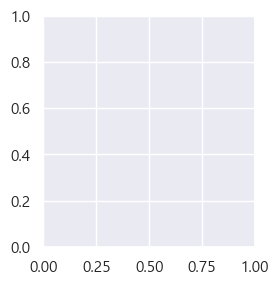

In [39]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()